# 🩺 Breast Cancer Classification Project

## 1. Dataset Description
We will be working with the **Breast Cancer Wisconsin Diagnostic Dataset**.  
- The dataset contains **569 records** of patients.  
- Each record has **30 numerical features** (e.g., radius, texture, perimeter, smoothness, etc.) that describe characteristics of cell nuclei present in breast cancer tissue.  
- The **target variable** is `Diagnosis`, which has two classes:
  - **M (Malignant)**
  - **B (Benign)**  

This is a **binary classification problem**, and we will use **Logistic Regression** to build our model.



In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:

# The data is in a .data file and separated by commas.
# The first few lines are metadata and should be skipped.

features = features = [
    "ID number",
    "Diagnosis",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst"
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                 comment='#', sep=',',names=features)

🔍 Step 1: Data Investigation
Load the dataset and display its first few rows.
Check for null values and duplicate entries.
Explore the dataset summary (shape, data types, statistics).


In [3]:
df.head()

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,ID number,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.isnull().sum()

,0
ID number,0
Diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
df["Diagnosis"].value_counts()

,count
Diagnosis,
B,357
M,212


In [11]:
df.duplicated().sum()

np.int64(0)

In [15]:
print("Dataset Shape:", df.shape)


Dataset Shape: (569, 32)


### 📊 Step 2: Data Visualization
- Visualize distributions of features.
- Use histograms, boxplots, or pairplots to understand data spread.
- Check relationships between features and the target variable (`Diagnosis`).
- Check count of categorical features and whether classes are balanced or not


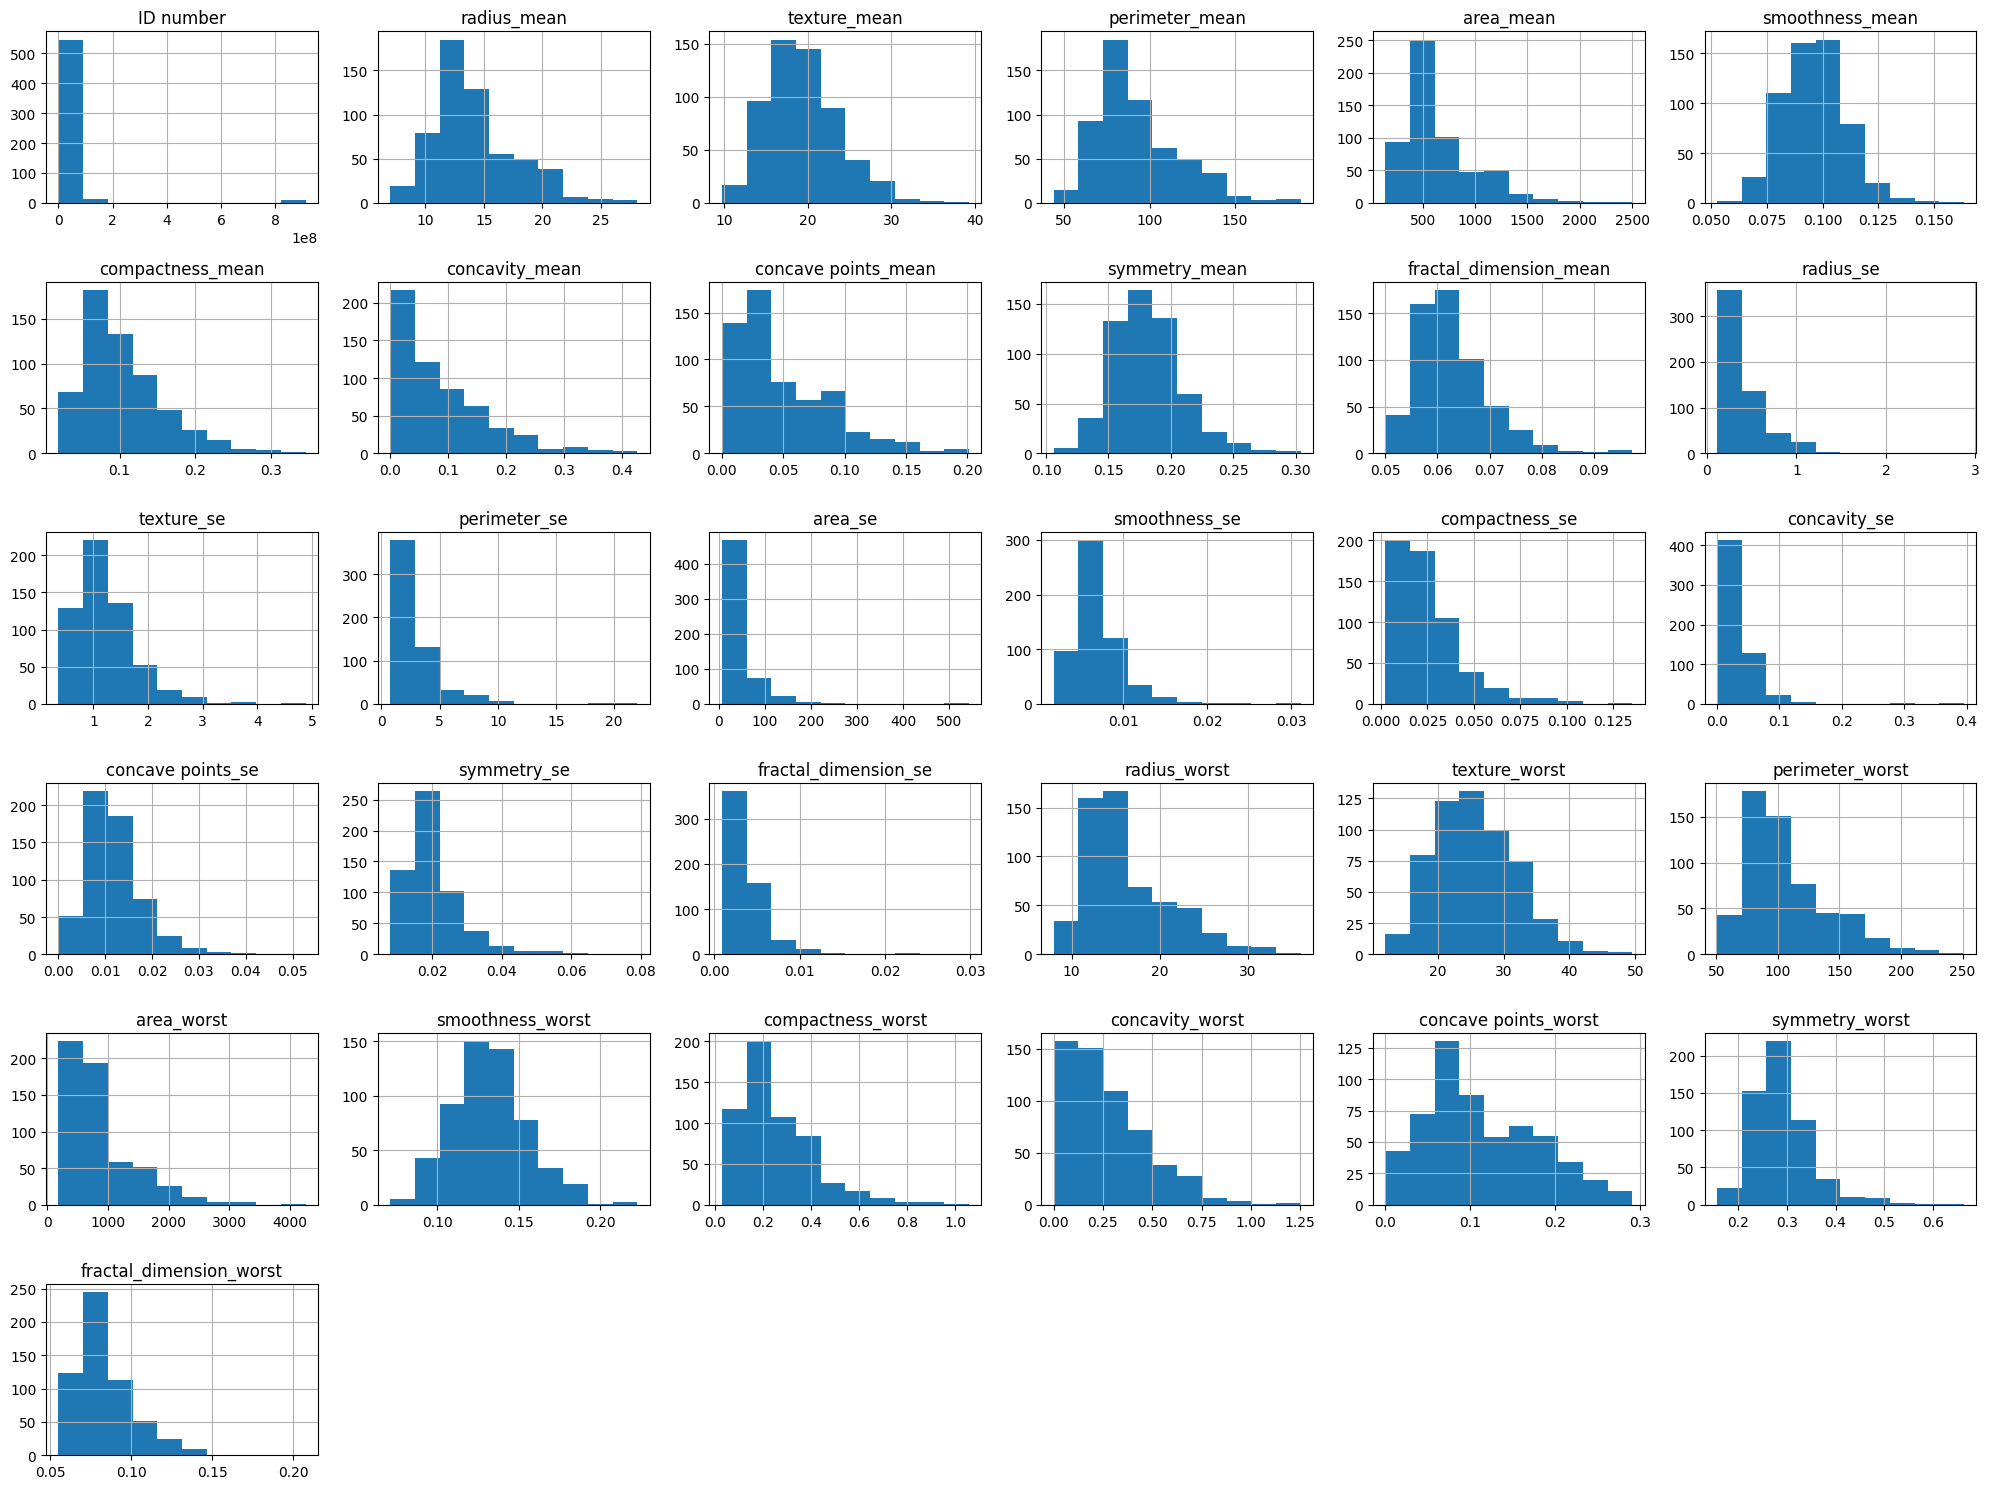

In [18]:
# Visualize distributions of numerical features using histograms
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

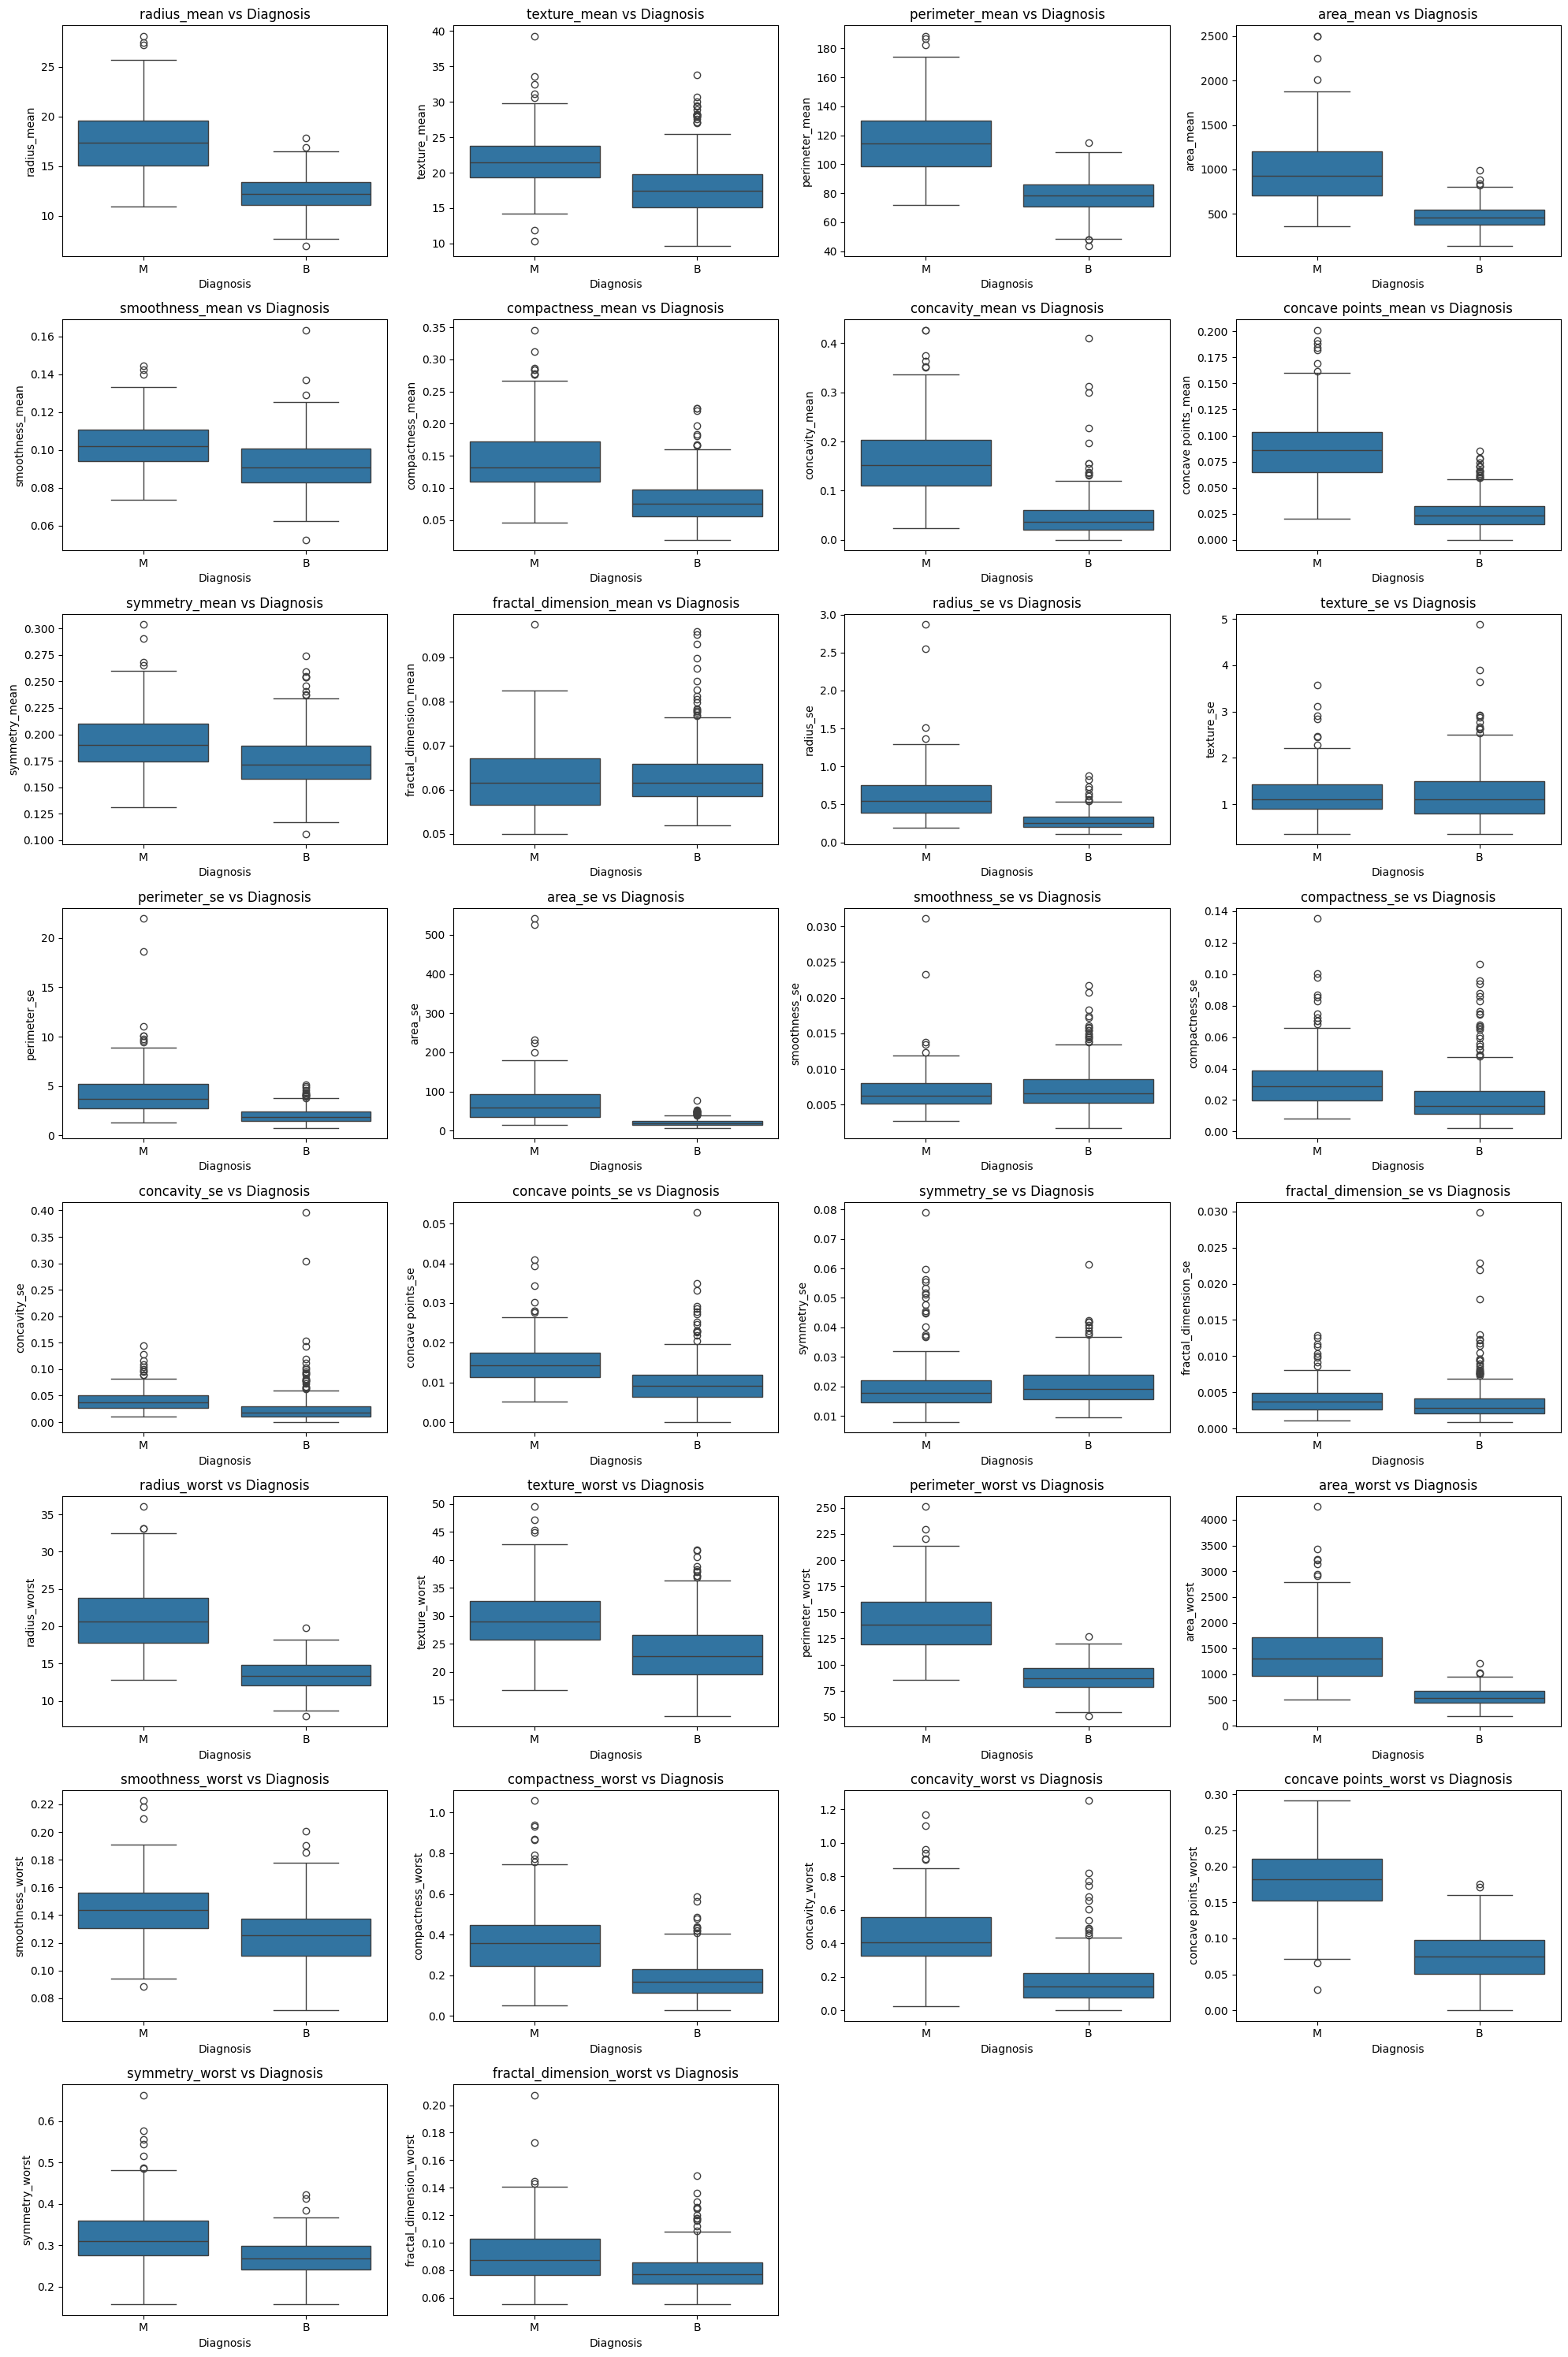

In [19]:
# Check relationships between features and the target variable (Diagnosis) using boxplots
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Exclude 'ID number' as it's not a relevant feature for the model
numerical_features.remove('ID number')

# Create boxplots for each numerical feature against the 'Diagnosis'
plt.figure(figsize=(20, 30))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 4 + 1, 4, i + 1)
    sns.boxplot(x='Diagnosis', y=feature, data=df)
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()
plt.show()

In [23]:
df["Diagnosis"].value_counts()
#inbalanced classes

,count
Diagnosis,
B,357
M,212


### ⚙️ Step 3: Data Preprocessing
- **Encoding:** Convert the categorical column `Diagnosis` into numeric values (e.g., Malignant = 1, Benign = 0).
- **Scaling:** Apply appropriate scaling (e.g., StandardScaler) to numeric features.
- **Drop irrelevant columns** like `ID number`.

In [56]:
df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})
df.head()

/tmp/ipython-input-3511430654.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})


,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df = df.drop('ID number', axis=1)


KeyError: "['ID number'] not found in axis"

In [29]:
df

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [34]:
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=['float64']).columns.tolist()
print(numerical_features)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [36]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### ✂️ Step 4: Train-Test Split
- Split the dataset into **train** and **test** sets.  
- Use the parameter `stratify=y` to ensure class distribution remains the same in both sets.  
- Check if the classes are **balanced**:
  - If imbalanced, either:
    - Handle using techniques like oversampling/undersampling, SMOTE OR  
    - Use the `class_weight="balanced"` parameter in Logistic Regression.


In [39]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [43]:
y_train.value_counts()

,count
Diagnosis,
B,250
M,148


In [44]:
y_test.value_counts()

,count
Diagnosis,
B,107
M,64


In [41]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


In [42]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

Class distribution before SMOTE: Diagnosis
B    250
M    148
Name: count, dtype: int64
Class distribution after SMOTE: Diagnosis
M    250
B    250
Name: count, dtype: int64


### 🤖 Step 5: Model Training
- Train a **Logistic Regression** model on the training data.


In [45]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)


### 📈 Step 6: Model Evaluation
Evaluate the model using:
1. **Confusion Matrix**  
   - Display the confusion matrix.  
   - Visualize it using a heatmap.  
2. **ROC Curve and AUC**  
   - Plot the ROC curve.  
   - Calculate the Area Under the Curve (AUC).  
3. **Classification Report**  
   - Report Precision, Recall, F1-score, and Accuracy.


In [66]:
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)

In [63]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[105   2]
 [ 11  53]]


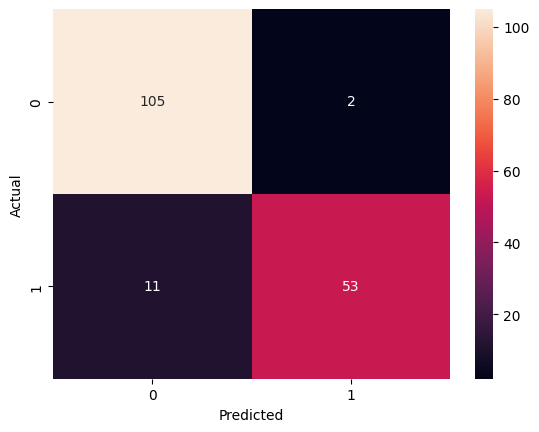

In [64]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

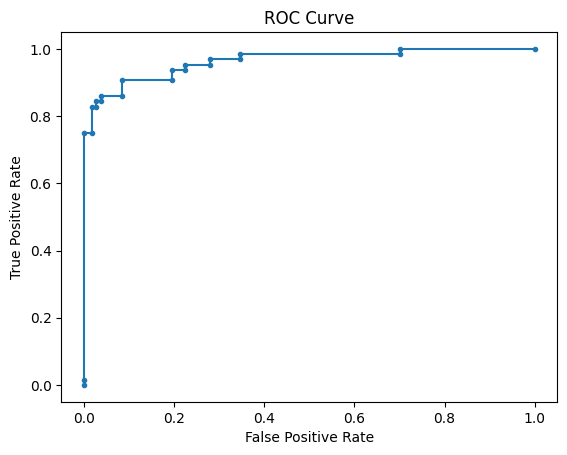

AUC Score: 0.9632009345794392


In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure y_test is numerical for roc_curve and roc_auc_score
y_test_numeric = y_test.map({'M': 1, 'B': 0})

y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_numeric, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test_numeric, y_prob)
print(f"AUC Score: {auc_score}")

In [67]:
print("Training Classification Report:\n")
print(classification_report(y_train, y_train_pred))

Training Classification Report:

              precision    recall  f1-score   support

           B       0.92      0.97      0.95       250
           M       0.94      0.86      0.90       148

    accuracy                           0.93       398
   macro avg       0.93      0.92      0.92       398
weighted avg       0.93      0.93      0.93       398



In [68]:
print("Testing Classification Report:\n")
print(classification_report(y_test, y_test_pred))

Testing Classification Report:

              precision    recall  f1-score   support

           B       0.91      0.98      0.94       107
           M       0.96      0.83      0.89        64

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171



### 📝 Step 7: Model Interpretation
- Compare **training vs testing performance**.  
- Write down your observations:  
  - Is the model performing well on both sets?  
  - Are there signs of **overfitting** or **underfitting**?  
  - What kind of errors is the model making (false positives vs false negatives)?  
  - What would be the medical consequences of these errors?
  - What is the error of our focus at this problem?




* As for the Accuracy, the model is performing well on both sets, but since this is a mediacal diagnosis, the recall is too low on both sets
* No overfitting nor underfitting
* we have 2 FP and 11 FN
* We have 11 patients that have the disease and have diagnosed to be clean so this is a fatal situation for their safety  
* FN are the most critical because this is a medical diagnosis




## 2. Project Tasks

### 🔍 Step 1: Data Investigation
- Load the dataset and display its first few rows.
- Check for **null values** and **duplicate entries**.
- Explore the dataset summary (shape, data types, statistics).

### 📊 Step 2: Data Visualization
- Visualize distributions of features.
- Use histograms, boxplots, or pairplots to understand data spread.
- Check relationships between features and the target variable (`Diagnosis`).
- Check count of categorical features and whether classes are balanced or not

### ⚙️ Step 3: Data Preprocessing
- **Encoding:** Convert the categorical column `Diagnosis` into numeric values (e.g., Malignant = 1, Benign = 0).
- **Scaling:** Apply appropriate scaling (e.g., StandardScaler) to numeric features.
- **Drop irrelevant columns** like `ID number`.

### ✂️ Step 4: Train-Test Split
- Split the dataset into **train** and **test** sets.  
- Use the parameter `stratify=y` to ensure class distribution remains the same in both sets.  
- Check if the classes are **balanced**:
  - If imbalanced, either:
    - Handle using techniques like oversampling/undersampling, SMOTE OR  
    - Use the `class_weight="balanced"` parameter in Logistic Regression.

### 🤖 Step 5: Model Training
- Train a **Logistic Regression** model on the training data.

### 📈 Step 6: Model Evaluation
Evaluate the model using:
1. **Confusion Matrix**  
   - Display the confusion matrix.  
   - Visualize it using a heatmap.  
2. **ROC Curve and AUC**  
   - Plot the ROC curve.  
   - Calculate the Area Under the Curve (AUC).  
3. **Classification Report**  
   - Report Precision, Recall, F1-score, and Accuracy.

### 📝 Step 7: Model Interpretation
- Compare **training vs testing performance**.  
- Write down your observations:  
  - Is the model performing well on both sets?  
  - Are there signs of **overfitting** or **underfitting**?  
  - What kind of errors is the model making (false positives vs false negatives)?  
  - What would be the medical consequences of these errors?
  - What is the error of our focus at this problem?


In [ ]:
df

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
